##map coloring problem

lineFromPoints -> gives equation of line as ax+by+c=0.
Is_line_crossing -> checks whether lines are intersecting or not.

Generated Points: [(0.37137028948789985, 0.5883522406935934), (0.5637623172062204, 0.37338573164423405), (0.23972909388632901, 0.04446271306965066), (0.4171768304930106, 0.30804063809634064)]
Generated Lines: [((0.4171768304930106, 0.30804063809634064), (0.5637623172062204, 0.37338573164423405)), ((0.4171768304930106, 0.30804063809634064), (0.37137028948789985, 0.5883522406935934)), ((0.4171768304930106, 0.30804063809634064), (0.23972909388632901, 0.04446271306965066)), ((0.23972909388632901, 0.04446271306965066), (0.5637623172062204, 0.37338573164423405)), ((0.23972909388632901, 0.04446271306965066), (0.37137028948789985, 0.5883522406935934)), ((0.5637623172062204, 0.37338573164423405), (0.37137028948789985, 0.5883522406935934))]


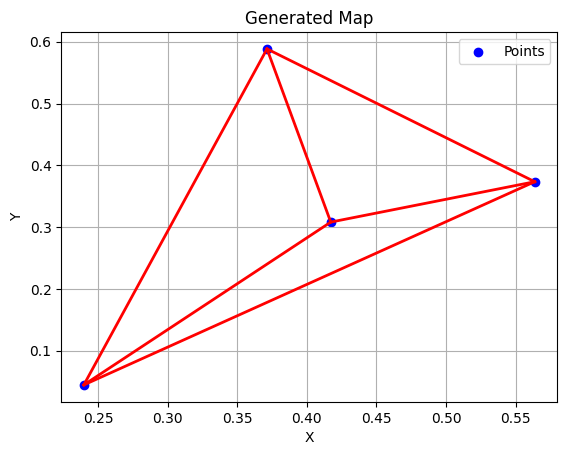

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def lineFromPoints(line):
    P, Q = line
    a = P[1] - Q[1]
    b = Q[0] - P[0]
    c = -a * P[0] - b * P[1]
    return a, b, c

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def is_line_crossing(existing_lines, line):
    a1, b1, c1 = lineFromPoints(line)
    for existed_line in existing_lines:
        a2, b2, c2 = lineFromPoints(existed_line)

        temp1 = a1 * existed_line[0][0] + b1 * existed_line[0][1] + c1
        temp2 = a1 * existed_line[1][0] + b1 * existed_line[1][1] + c1
        temp3 = a2 * line[0][0] + b2 * line[0][1] + c2
        temp4 = a2 * line[1][0] + b2 * line[1][1] + c2

        if (temp1 * temp2 < 0) and (temp3 * temp4 < 0):
            return True

    return False

def generate_map(n):
    points = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(n)]
    edges = [(point[0], point[1]) for point in points]
    lines = []

    while len(points) > 1:
        x = points.pop()
        temp_points = [point for point in points]
        while len(temp_points) > 0:
            nearest_point = min(temp_points, key=lambda point: euclidean_distance(x, point))
            temp_points.remove(nearest_point)
            if not is_line_crossing(lines, (x, nearest_point)):
                lines.append((x, nearest_point))

    return edges, lines



n = 4
max_colors = 4

edges, lines = generate_map(n)
print("Generated Points:", edges)
print("Generated Lines:", lines)

x_points, y_points = zip(*edges)
plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

# Plot lines
for line in lines:
    x_line, y_line = zip(*line)
    plt.plot(x_line, y_line, c='r', linestyle='-', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Map')
plt.legend(loc='best')
plt.grid(True)
plt.show()



Generates the graph from the given plot in form of dictanary

In [ ]:
# Create a graph where nodes are lines (edges) and edges are connected if they share a common point.
graph = {line: set() for line in lines}
for i, line1 in enumerate(lines):
    for j, line2 in enumerate(lines):
        if i != j:
            if any(point in line2 for point in line1):
                graph[line1].add(line2)

uses min conflict algo

Edge Colors: {((0.4171768304930106, 0.30804063809634064), (0.5637623172062204, 0.37338573164423405)): 2, ((0.4171768304930106, 0.30804063809634064), (0.37137028948789985, 0.5883522406935934)): 3, ((0.4171768304930106, 0.30804063809634064), (0.23972909388632901, 0.04446271306965066)): 1, ((0.23972909388632901, 0.04446271306965066), (0.5637623172062204, 0.37338573164423405)): 3, ((0.23972909388632901, 0.04446271306965066), (0.37137028948789985, 0.5883522406935934)): 2, ((0.5637623172062204, 0.37338573164423405), (0.37137028948789985, 0.5883522406935934)): 4}


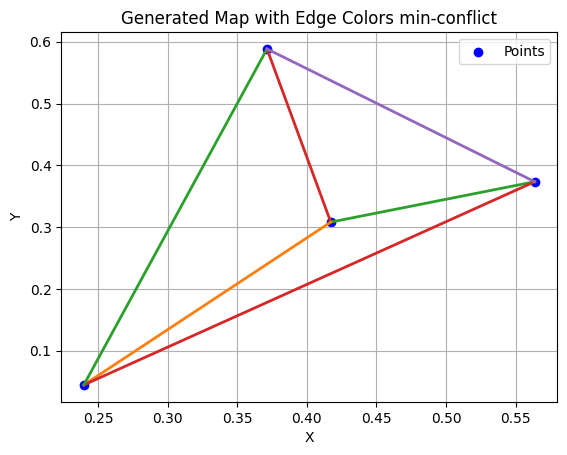

In [ ]:
def min_conflicts(graph, max_steps):
    def get_conflicts(node, color):
        return sum(1 for neighbor in graph[node] if colors[neighbor] == color)

    def choose_conflict_node():
        conflicts = [(node, get_conflicts(node, colors[node])) for node in graph]
        conflicts.sort(key=lambda x: x[1], reverse=True)
        return conflicts[0][0]

    nodes = list(graph.keys())
    colors = {node: random.randint(1, max_colors) for node in nodes}
    temp=0
    for _ in range(max_steps):
        node = choose_conflict_node()
        min_color = colors[node]
        min_conflicts = get_conflicts(node, min_color)
        if(min_conflicts==0):
            temp=1
            break

        for color in range(1, max_colors + 1):
            if color != min_color:
                conflicts = get_conflicts(node, color)
                if conflicts < min_conflicts:
                    min_color = color
                    min_conflicts = conflicts

        colors[node] = min_color
    if(temp==1):
        return colors

    return {}


colors = min_conflicts(graph, max_steps=1000)
colours=colors
if(colors=={}):
    print("can't color the graph")
else:
    print("Edge Colors:", colors)

# Plot points
x_points, y_points = zip(*edges)
plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

# Plot lines with colors
for line, color in colors.items():
    x_line, y_line = zip(*line)
    plt.plot(x_line, y_line, c='C' + str(color), linestyle='-', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Map with Edge Colors min-conflict')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Backtracking with forward checking

Graph can be colored.
Color assignment: {((0.4171768304930106, 0.30804063809634064), (0.5637623172062204, 0.37338573164423405)): 4, ((0.4171768304930106, 0.30804063809634064), (0.37137028948789985, 0.5883522406935934)): 2, ((0.4171768304930106, 0.30804063809634064), (0.23972909388632901, 0.04446271306965066)): 1, ((0.23972909388632901, 0.04446271306965066), (0.5637623172062204, 0.37338573164423405)): 3, ((0.23972909388632901, 0.04446271306965066), (0.37137028948789985, 0.5883522406935934)): 4}


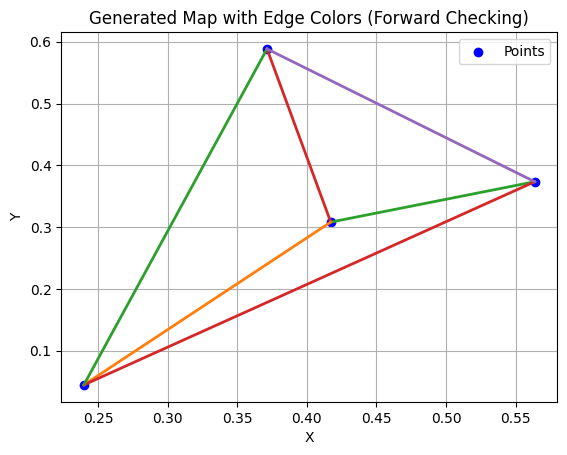

In [ ]:
def forward_checking(graph, max_colors, max_steps):
    def get_available_colors(node):
        used_colors = {colors[neighbor] for neighbor in graph[node] if neighbor in colors}
        return [color for color in range(1, max_colors + 1) if color not in used_colors]

    nodes = list(graph.keys())
    colors = {}  # Initialize an empty color assignment

    def backtrack(node):
        if node == nodes[-1]:
            return True
        available_colors = get_available_colors(node)
        random.shuffle(available_colors)
        for color in available_colors:
            colors[node] = color
            if backtrack(nodes[nodes.index(node) + 1]):
                return True
            del colors[node]
        return False

    # Apply the backtrack function starting with the first node
    result = backtrack(nodes[0])

    return result, colors  # Return the result and color assignment



# Apply forward checking with backtracking
success, colors = forward_checking(graph, max_colors, 1000)

if success:
    print("Graph can be colored.")
    print("Color assignment:", colors)
else:
    print("Graph cannot be colored within the specified steps.")

# Plot points
x_points, y_points = zip(*edges)
plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

if success:
    # Plot lines with colors
    for line, color in colours.items():
        x_line, y_line = zip(*line)
        plt.plot(x_line, y_line, c='C' + str(color), linestyle='-', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Map with Edge Colors (Forward Checking)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Backtracking with mrv

Graph can be colored.
Color assignment: {((0.4171768304930106, 0.30804063809634064), (0.5637623172062204, 0.37338573164423405)): 4, ((0.4171768304930106, 0.30804063809634064), (0.37137028948789985, 0.5883522406935934)): 2, ((0.4171768304930106, 0.30804063809634064), (0.23972909388632901, 0.04446271306965066)): 1, ((0.23972909388632901, 0.04446271306965066), (0.5637623172062204, 0.37338573164423405)): 3, ((0.23972909388632901, 0.04446271306965066), (0.37137028948789985, 0.5883522406935934)): 4}


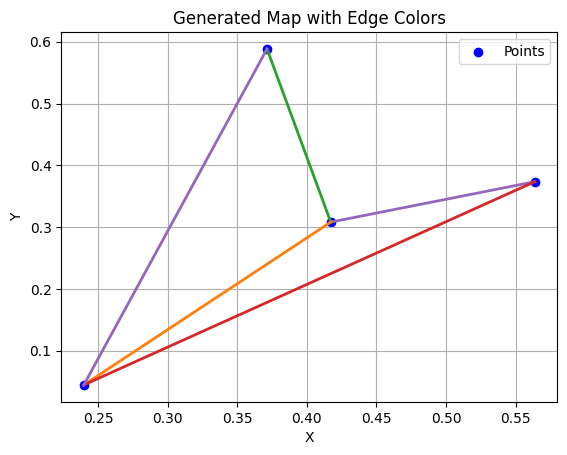

In [ ]:
def forward_checking_mrv(graph, max_colors, max_steps):
    def get_available_colors(node):
        used_colors = {colors[neighbor] for neighbor in graph[node] if neighbor in colors}
        return [color for color in range(1, max_colors + 1) if color not in used_colors]

    def choose_mrv_node():
        uncolored_nodes = [node for node in nodes if node not in colors]
        if not uncolored_nodes:
            return None  # No uncolored nodes left
        return min(uncolored_nodes, key=lambda node: len(get_available_colors(node)))

    nodes = list(graph.keys())
    colors = {}

    def backtrack(node):
        if node is None:
            return True
        available_colors = get_available_colors(node)
        random.shuffle(available_colors)
        for color in available_colors:
            colors[node] = color
            if backtrack(choose_mrv_node()):
                return True
            del colors[node]
        return False

    if backtrack(choose_mrv_node()):
        return colors
    else:
        return {}  # Indicate failure by returning an empty dictionary

if colors:
    print("Graph can be colored.")
    print("Color assignment:", colors)

    # Plot points
    x_points, y_points = zip(*edges)
    plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

    # Plot lines with colors
    for line, color in colors.items():
        x_line, y_line = zip(*line)
        plt.plot(x_line, y_line, c='C' + str(color), linestyle='-', linewidth=2)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Generated Map with Edge Colors')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
else:
    print("Graph cannot be colored within the specified steps.")



Generated Points: [(0.6292970054024789, 0.8850279975117835), (0.5286813720978123, 0.09620970775172322), (0.35229267841236256, 0.8895391554122221), (0.22743694396931924, 0.2986467776300321), (0.01036149925965657, 0.8175921238108939), (0.17777266350367515, 0.1396270419276756), (0.3573722245241824, 0.7499983487401183), (0.9278500970959748, 0.21993210723922296), (0.6288747116210538, 0.9153809281446282), (0.8599526719444125, 0.16464098840786023)]
Generated Lines: [((0.8599526719444125, 0.16464098840786023), (0.9278500970959748, 0.21993210723922296)), ((0.8599526719444125, 0.16464098840786023), (0.5286813720978123, 0.09620970775172322)), ((0.8599526719444125, 0.16464098840786023), (0.22743694396931924, 0.2986467776300321)), ((0.8599526719444125, 0.16464098840786023), (0.17777266350367515, 0.1396270419276756)), ((0.8599526719444125, 0.16464098840786023), (0.6292970054024789, 0.8850279975117835)), ((0.8599526719444125, 0.16464098840786023), (0.3573722245241824, 0.7499983487401183)), ((0.859952

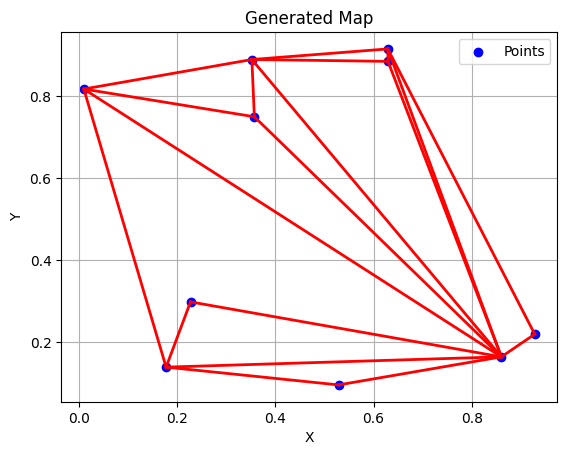

Edge Colors: {((0.8599526719444125, 0.16464098840786023), (0.9278500970959748, 0.21993210723922296)): 4, ((0.8599526719444125, 0.16464098840786023), (0.5286813720978123, 0.09620970775172322)): 6, ((0.8599526719444125, 0.16464098840786023), (0.22743694396931924, 0.2986467776300321)): 8, ((0.8599526719444125, 0.16464098840786023), (0.17777266350367515, 0.1396270419276756)): 3, ((0.8599526719444125, 0.16464098840786023), (0.6292970054024789, 0.8850279975117835)): 1, ((0.8599526719444125, 0.16464098840786023), (0.3573722245241824, 0.7499983487401183)): 7, ((0.8599526719444125, 0.16464098840786023), (0.6288747116210538, 0.9153809281446282)): 2, ((0.8599526719444125, 0.16464098840786023), (0.35229267841236256, 0.8895391554122221)): 5, ((0.8599526719444125, 0.16464098840786023), (0.01036149925965657, 0.8175921238108939)): 10, ((0.6288747116210538, 0.9153809281446282), (0.6292970054024789, 0.8850279975117835)): 6, ((0.6288747116210538, 0.9153809281446282), (0.35229267841236256, 0.8895391554122

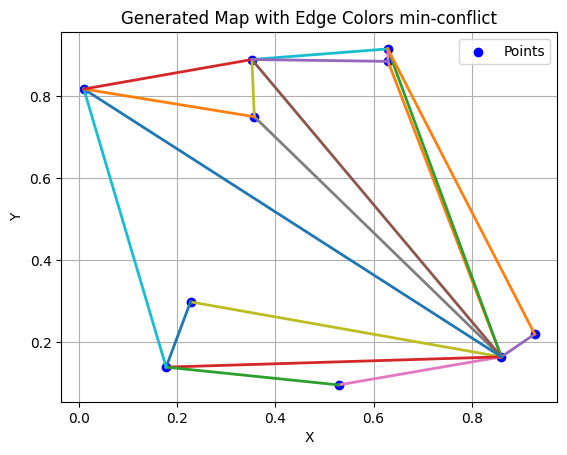

Graph can be colored.
Color assignment: {((0.8599526719444125, 0.16464098840786023), (0.9278500970959748, 0.21993210723922296)): 4, ((0.8599526719444125, 0.16464098840786023), (0.5286813720978123, 0.09620970775172322)): 10, ((0.8599526719444125, 0.16464098840786023), (0.22743694396931924, 0.2986467776300321)): 9, ((0.8599526719444125, 0.16464098840786023), (0.17777266350367515, 0.1396270419276756)): 5, ((0.8599526719444125, 0.16464098840786023), (0.6292970054024789, 0.8850279975117835)): 2, ((0.8599526719444125, 0.16464098840786023), (0.3573722245241824, 0.7499983487401183)): 6, ((0.8599526719444125, 0.16464098840786023), (0.6288747116210538, 0.9153809281446282)): 3, ((0.8599526719444125, 0.16464098840786023), (0.35229267841236256, 0.8895391554122221)): 7, ((0.8599526719444125, 0.16464098840786023), (0.01036149925965657, 0.8175921238108939)): 8, ((0.6288747116210538, 0.9153809281446282), (0.6292970054024789, 0.8850279975117835)): 7, ((0.6288747116210538, 0.9153809281446282), (0.3522926

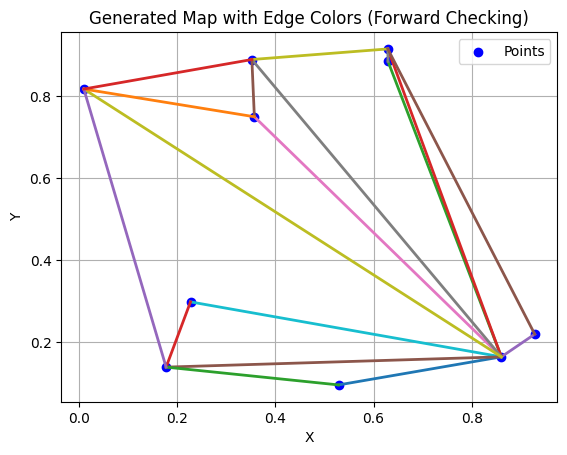

Graph can be colored.
Color assignment: {((0.8599526719444125, 0.16464098840786023), (0.9278500970959748, 0.21993210723922296)): 4, ((0.8599526719444125, 0.16464098840786023), (0.5286813720978123, 0.09620970775172322)): 10, ((0.8599526719444125, 0.16464098840786023), (0.22743694396931924, 0.2986467776300321)): 9, ((0.8599526719444125, 0.16464098840786023), (0.17777266350367515, 0.1396270419276756)): 5, ((0.8599526719444125, 0.16464098840786023), (0.6292970054024789, 0.8850279975117835)): 2, ((0.8599526719444125, 0.16464098840786023), (0.3573722245241824, 0.7499983487401183)): 6, ((0.8599526719444125, 0.16464098840786023), (0.6288747116210538, 0.9153809281446282)): 3, ((0.8599526719444125, 0.16464098840786023), (0.35229267841236256, 0.8895391554122221)): 7, ((0.8599526719444125, 0.16464098840786023), (0.01036149925965657, 0.8175921238108939)): 8, ((0.6288747116210538, 0.9153809281446282), (0.6292970054024789, 0.8850279975117835)): 7, ((0.6288747116210538, 0.9153809281446282), (0.3522926

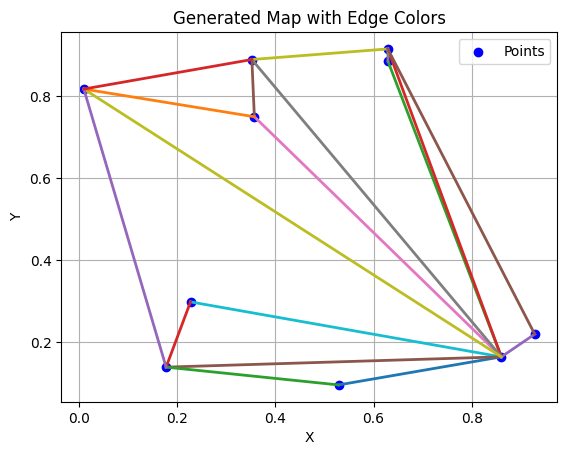

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def lineFromPoints(line):
    P, Q = line
    a = P[1] - Q[1]
    b = Q[0] - P[0]
    c = -a * P[0] - b * P[1]
    return a, b, c

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def is_line_crossing(existing_lines, line):
    a1, b1, c1 = lineFromPoints(line)
    for existed_line in existing_lines:
        a2, b2, c2 = lineFromPoints(existed_line)

        temp1 = a1 * existed_line[0][0] + b1 * existed_line[0][1] + c1
        temp2 = a1 * existed_line[1][0] + b1 * existed_line[1][1] + c1
        temp3 = a2 * line[0][0] + b2 * line[0][1] + c2
        temp4 = a2 * line[1][0] + b2 * line[1][1] + c2

        if (temp1 * temp2 < 0) and (temp3 * temp4 < 0):
            return True

    return False

def generate_map(n):
    points = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(n)]
    edges = [(point[0], point[1]) for point in points]
    lines = []

    while len(points) > 1:
        x = points.pop()
        temp_points = [point for point in points]
        while len(temp_points) > 0:
            nearest_point = min(temp_points, key=lambda point: euclidean_distance(x, point))
            temp_points.remove(nearest_point)
            if not is_line_crossing(lines, (x, nearest_point)):
                lines.append((x, nearest_point))

    return edges, lines

def min_conflicts(graph, max_steps):
    def get_conflicts(node, color):
        return sum(1 for neighbor in graph[node] if colors[neighbor] == color)

    def choose_conflict_node():
        conflicts = [(node, get_conflicts(node, colors[node])) for node in graph]
        conflicts.sort(key=lambda x: x[1], reverse=True)
        return conflicts[0][0]

    nodes = list(graph.keys())
    colors = {node: random.randint(1, max_colors) for node in nodes}
    temp=0
    for _ in range(max_steps):
        node = choose_conflict_node()
        min_color = colors[node]
        min_conflicts = get_conflicts(node, min_color)
        if(min_conflicts==0):
            temp=1
            break

        for color in range(1, max_colors + 1):
            if color != min_color:
                conflicts = get_conflicts(node, color)
                if conflicts < min_conflicts:
                    min_color = color
                    min_conflicts = conflicts

        colors[node] = min_color
    if(temp==1):
        return colors

    return {}

n = 10
max_colors = 10

edges, lines = generate_map(n)
print("Generated Points:", edges)
print("Generated Lines:", lines)

x_points, y_points = zip(*edges)
plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

# Plot lines
for line in lines:
    x_line, y_line = zip(*line)
    plt.plot(x_line, y_line, c='r', linestyle='-', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Map')
plt.legend(loc='best')
plt.grid(True)
plt.show()




# Create a graph where nodes are lines (edges) and edges are connected if they share a common point.
graph = {line: set() for line in lines}
for i, line1 in enumerate(lines):
    for j, line2 in enumerate(lines):
        if i != j:
            if any(point in line2 for point in line1):
                graph[line1].add(line2)

colors = min_conflicts(graph, max_steps=1000)
if(colors=={}):
    print("can't color the graph")
else:
    print("Edge Colors:", colors)

# Plot points
x_points, y_points = zip(*edges)
plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

# Plot lines with colors
for line, color in colors.items():
    x_line, y_line = zip(*line)
    plt.plot(x_line, y_line, c='C' + str(color), linestyle='-', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Map with Edge Colors min-conflict')
plt.legend(loc='best')
plt.grid(True)
plt.show()



def forward_checking(graph, max_colors, max_steps):
    def get_available_colors(node):
        used_colors = {colors[neighbor] for neighbor in graph[node] if neighbor in colors}
        return [color for color in range(1, max_colors + 1) if color not in used_colors]

    nodes = list(graph.keys())
    colors = {}  # Initialize an empty color assignment

    def backtrack(node):
        if node == nodes[-1]:
            return True
        available_colors = get_available_colors(node)
        random.shuffle(available_colors)
        for color in available_colors:
            colors[node] = color
            if backtrack(nodes[nodes.index(node) + 1]):
                return True
            del colors[node]
        return False

    # Apply the backtrack function starting with the first node
    result = backtrack(nodes[0])

    return result, colors  # Return the result and color assignment



# Apply forward checking with backtracking
success, colors = forward_checking(graph, max_colors, 1000)

if success:
    print("Graph can be colored.")
    print("Color assignment:", colors)
else:
    print("Graph cannot be colored within the specified steps.")

# Plot points
x_points, y_points = zip(*edges)
plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

if success:
    # Plot lines with colors
    for line, color in colors.items():
        x_line, y_line = zip(*line)
        plt.plot(x_line, y_line, c='C' + str(color), linestyle='-', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Map with Edge Colors (Forward Checking)')
plt.legend(loc='best')
plt.grid(True)
plt.show()





def forward_checking_mrv(graph, max_colors, max_steps):
    def get_available_colors(node):
        used_colors = {colors[neighbor] for neighbor in graph[node] if neighbor in colors}
        return [color for color in range(1, max_colors + 1) if color not in used_colors]

    def choose_mrv_node():
        uncolored_nodes = [node for node in nodes if node not in colors]
        if not uncolored_nodes:
            return None  # No uncolored nodes left
        return min(uncolored_nodes, key=lambda node: len(get_available_colors(node)))

    nodes = list(graph.keys())
    colors = {}

    def backtrack(node):
        if node is None:
            return True
        available_colors = get_available_colors(node)
        random.shuffle(available_colors)
        for color in available_colors:
            colors[node] = color
            if backtrack(choose_mrv_node()):
                return True
            del colors[node]
        return False

    if backtrack(choose_mrv_node()):
        return colors
    else:
        return {}  # Indicate failure by returning an empty dictionary

if colors:
    print("Graph can be colored.")
    print("Color assignment:", colors)

    # Plot points
    x_points, y_points = zip(*edges)
    plt.scatter(x_points, y_points, c='b', marker='o', label='Points')

    # Plot lines with colors
    for line, color in colors.items():
        x_line, y_line = zip(*line)
        plt.plot(x_line, y_line, c='C' + str(color), linestyle='-', linewidth=2)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Generated Map with Edge Colors')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
else:
    print("Graph cannot be colored within the specified steps.")





n=4 --> 0 seconds
n=10--> 2 seconds

As the no of points increases number time increases


from this each graph can get any color based on algorithm